## Accessing ocean models: RTOFS
In this notebook, we demonstrate how to access the RTOFS-DA model that RUCOOL is scraping from NOAA/NCEPs ftp server.

Here is a little bit of information about the model:

The global operational Real-Time Ocean Forecast System (Global RTOFS) at the National Centers for Environmental Prediction is based on an eddy resolving 1/12° global HYCOM (HYbrid Coordinates Ocean Model) and is part of a larger national backbone capability of ocean modeling at the National Weather Service in a strong partnership with the US Navy. The model is run once a day, completing at about 1700Z. Each run starts with a 24 hr hindcast and produces ocean surface forecasts every hour and full volume forecasts every 6 hours out to 192 hours. 

Currently, the data is uploaded to a NOAA ftp server (ftp://ftp.ncei.noaa.gov/pub/data/nccf/com/rtofs/prod/) of the current days model run. The FTP server only contains the most recent model run and the previous days model run so we have to save the data locally on fileserver here at Rutgers. 

Scraping all the data for each days model run would be impossible for us to manage in terms of file storage so this thredds dataset contains the first 4 full volume forecasts for each day's model run for the US East Coast region.

In [1]:
# Import all packages that we need to load (xarray), perform calculations (numpy), and plot (matplotlib and cmocean) the data
from cmocean import cm
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
# url of the thredds server containing scraped RTOFS data
url = "https://tds.marine.rutgers.edu/thredds/dodsC/cool/rtofs/rtofs_us_east_scraped"

# Use the xarray open_dataset function to access the dataset via opendap
ds = xr.open_dataset(url)
ds

<xarray.Dataset>
Dimensions:      (depth: 40, y: 1710, x: 742, time: 1632)
Coordinates:
  * depth        (depth) float32 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * y            (y) int32 1 2 3 4 5 6 7 ... 1704 1705 1706 1707 1708 1709 1710
  * x            (x) int32 1 2 3 4 5 6 7 8 9 ... 735 736 737 738 739 740 741 742
  * time         (time) datetime64[ns] 2021-03-04T06:00:00 ... 2022-04-19
Data variables:
    date         (time) float64 ...
    lat          (y, x) float32 ...
    lon          (y, x) float32 ...
    u            (time, depth, y, x) float32 ...
    v            (time, depth, y, x) float32 ...
    temperature  (time, depth, y, x) float32 ...
    salinity     (time, depth, y, x) float32 ...
Attributes:
    Conventions:  CF-1.0
    title:        HYCOM ATLb2.00
    institution:  National Centers for Environmental Prediction
    source:       ftp://ftp.ncei.noaa.gov/pub/data/nccf/com/rtofs/prod/
    experiment:   92.8
    history:      archv2ncdf3z
    region:       Atlantic/US East Coast
    comment:      This dataset contains the first 4 full volume forecasts (f0...

We can see the dimensions of the ROTFS data are depth, y, x, and time. Data is output spatially on the same depth, y, and x dimensions, while each file is aggregated on the time variable. 

Let's take a look at the data. Since there are thousands of timestamps available to look at, we will select the most recent timestamp available using the xarray .isel feature to select based off of the dataset indexes. 

In [3]:
tds = ds.isel(time=-1) 
tds

<xarray.Dataset>
Dimensions:      (depth: 40, y: 1710, x: 742)
Coordinates:
  * depth        (depth) float32 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * y            (y) int32 1 2 3 4 5 6 7 ... 1704 1705 1706 1707 1708 1709 1710
  * x            (x) int32 1 2 3 4 5 6 7 8 9 ... 735 736 737 738 739 740 741 742
    time         datetime64[ns] 2022-04-14
Data variables:
    date         float64 2.022e+07
    lat          (y, x) float32 ...
    lon          (y, x) float32 ...
    u            (depth, y, x) float32 ...
    v            (depth, y, x) float32 ...
    temperature  (depth, y, x) float32 ...
    salinity     (depth, y, x) float32 ...
Attributes:
    Conventions:  CF-1.0
    title:        HYCOM ATLb2.00
    institution:  National Centers for Environmental Prediction
    source:       ftp://ftp.ncei.noaa.gov/pub/data/nccf/com/rtofs/prod/
    experiment:   92.8
    history:      archv2ncdf3z
    region:       Atlantic/US East Coast
    comment:      This dataset contains the first 4 full volume forecasts (f0...

RTOFS has dimensions of depth, y, and x. Let's see what the data looks like when we try to plot something.

We use .sel(depth=0) to select the surface layer.

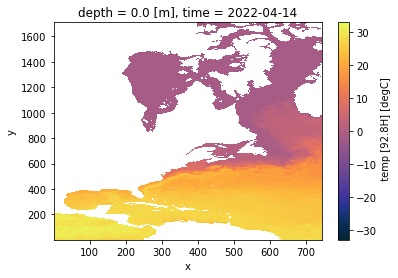

In [7]:
# Use xarrays built-in plotting wrappers around matplotlib to plot temperature
tds.temperature.sel(depth=0).plot(x="x", y="y", cmap=cm.thermal)

This looks correct. Let's try to plot it against longitude and latitude.

In [8]:
# Use xarrays built-in plotting wrappers around matplotlib to plot temperature
tds.temperature.isel(depth=0).plot(x="lon", y="lat", cmap=cm.thermal)

ValueError: x must be one of None, 'depth', 'time', 'x', 'y'

We can see from the ValueError that we must use 'depth', 'time', 'x', or 'y' as our axis selectors. These are all coordinates. We can make lon and lat coordinates by using .set_coords on the dataset.

In [9]:
tds = tds.set_coords(['lon', 'lat'])
tds

<xarray.Dataset>
Dimensions:      (depth: 40, y: 1710, x: 742)
Coordinates:
  * depth        (depth) float32 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * y            (y) int32 1 2 3 4 5 6 7 ... 1704 1705 1706 1707 1708 1709 1710
  * x            (x) int32 1 2 3 4 5 6 7 8 9 ... 735 736 737 738 739 740 741 742
    time         datetime64[ns] 2022-04-14
    lat          (y, x) float32 ...
    lon          (y, x) float32 ...
Data variables:
    date         float64 2.022e+07
    u            (depth, y, x) float32 ...
    v            (depth, y, x) float32 ...
    temperature  (depth, y, x) float32 ...
    salinity     (depth, y, x) float32 ...
Attributes:
    Conventions:  CF-1.0
    title:        HYCOM ATLb2.00
    institution:  National Centers for Environmental Prediction
    source:       ftp://ftp.ncei.noaa.gov/pub/data/nccf/com/rtofs/prod/
    experiment:   92.8
    history:      archv2ncdf3z
    region:       Atlantic/US East Coast
    comment:      This dataset contains the first 4 full volume forecasts (f0...

We can see that lon and lat are now coordinates of the dataset. Let's try to run the plot command from the cell that just failed again.

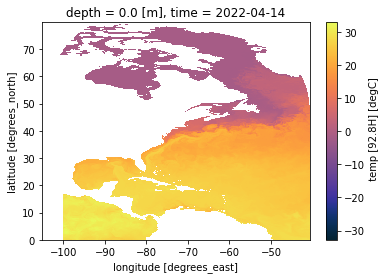

In [10]:
# Use xarrays built-in plotting wrappers around matplotlib to plot temperature
tds.temperature.isel(depth=0).plot(x="lon", y="lat", cmap=cm.thermal)

Much better. However, we still will not be able to use the .sel statement to slice our lon/lats.

.sel only works on dimensions which are time, depth, y, and x. We will need to convert lon/lat to x/y in order to subset the data. To do this, we can write a function to find the nearest index (x/y) of the lon/lat points that we want to select.

# Convert longitude and latitude to x and y indexes

In [11]:
# Subset the model of the Mid atlantic bight
lons = [-77, -67]
lats = [43, 35]

# Sort the lons and lats so they are in  
lons.sort()
lats.sort()

# Save rtofs lon and lat as variables to speed up indexing calculation
rtofs_lon = tds.lon.values
rtofs_lat = tds.lat.values

### Create a function to find the closest value on an array

In [12]:
def find_nearest(array, value):
    """
    Find the index of the closest value in an array

    Args:
        array (list or np.array): Array to locate values on
        value (list or np.array): Values to locate on array

    Returns:
        float, int: value(s), index of the nearest neighbors 
    """
    # Subtract values from array. Use .argmin() to find the indices of the minimum values along an axis.
    idx = (np.abs(array-value)).argmin()
    
    # Return the closest value and the index of the closest value.
    # Use .flat on the array to collapse the m x n array into a one dimensional array
    return array.flat[idx], idx

In [13]:
# Find index of nearest lon and lat points
_, lon1_ind = find_nearest(rtofs_lon[0, :], lons[0])
_, lon2_ind = find_nearest(rtofs_lon[0, :], lons[1])

_, lat1_ind = find_nearest(rtofs_lat[:, 0], lats[0])
_, lat2_ind = find_nearest(rtofs_lat[:, 0], lats[1])

rtofs_extent = [lon1_ind, lon2_ind, lat1_ind, lat2_ind]
rtofs_extent
print(f"lon,lon: {lons[0]}, {lons[1]} -> x,y: {lon1_ind}, {lon2_ind}")
print(f"lat,lat:  {lats[1]},  {lats[1]} -> x,y: {lat1_ind}, {lat2_ind}")

lon,lon: -77, -67 -> x,y: 287, 412
lat,lat:  43,  43 -> x,y: 468, 596


We can see that the function returned the nearest index to where the value we input is located

# Subset the rtofs dataset to the extent of the Mid-Atlantic Bight region

In [14]:
# Use the xarray .isel selector on x/y since we know the exact indexes we want to slice
# Use the xarray .sel selector on depth since we want to slice by depth 0 -> 500m
rds = tds.isel(
    x=slice(rtofs_extent[0], rtofs_extent[1]),
    y=slice(rtofs_extent[2], rtofs_extent[3])
    ).sel(depth=slice(0, 500))
rds

<xarray.Dataset>
Dimensions:      (depth: 28, y: 128, x: 125)
Coordinates:
  * depth        (depth) float32 0.0 2.0 4.0 6.0 8.0 ... 300.0 350.0 400.0 500.0
  * y            (y) int32 469 470 471 472 473 474 ... 591 592 593 594 595 596
  * x            (x) int32 288 289 290 291 292 293 ... 407 408 409 410 411 412
    time         datetime64[ns] 2022-04-14
    lat          (y, x) float32 35.03 35.03 35.03 35.03 ... 42.91 42.91 42.91
    lon          (y, x) float32 -77.04 -76.96 -76.88 ... -67.28 -67.2 -67.12
Data variables:
    date         float64 2.022e+07
    u            (depth, y, x) float32 ...
    v            (depth, y, x) float32 ...
    temperature  (depth, y, x) float32 ...
    salinity     (depth, y, x) float32 ...
Attributes:
    Conventions:  CF-1.0
    title:        HYCOM ATLb2.00
    institution:  National Centers for Environmental Prediction
    source:       ftp://ftp.ncei.noaa.gov/pub/data/nccf/com/rtofs/prod/
    experiment:   92.8
    history:      archv2ncdf3z
    region:       Atlantic/US East Coast
    comment:      This dataset contains the first 4 full volume forecasts (f0...

Let's plot the subsetted dataset to make sure it looks correct

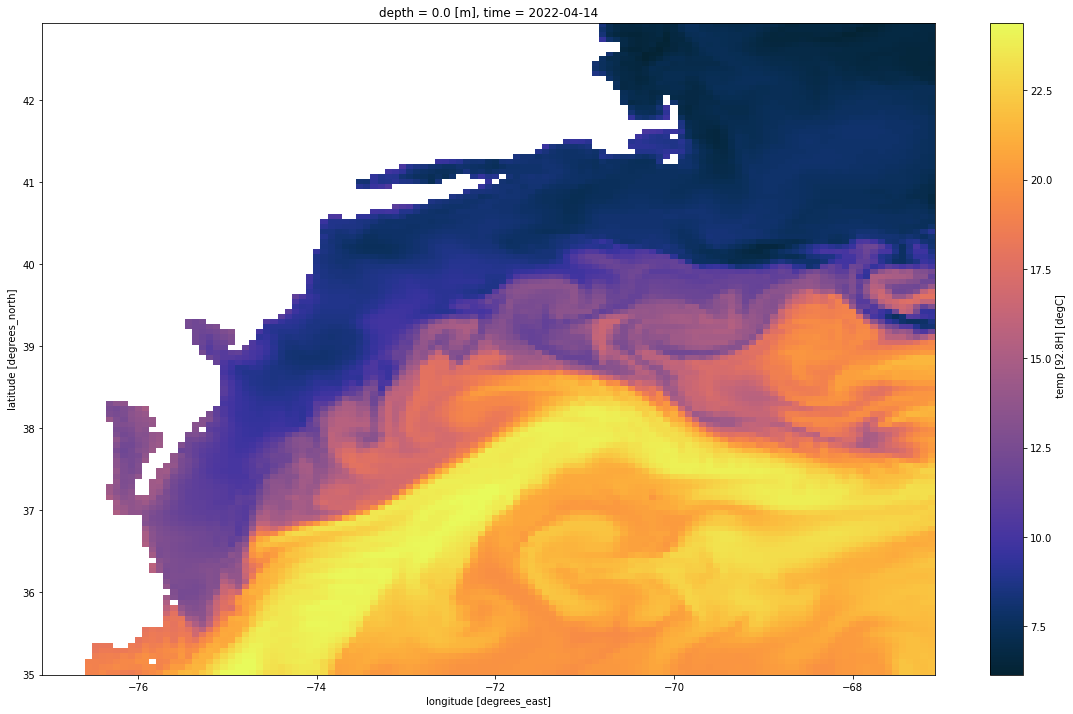

In [20]:
rds.temperature.isel(depth=0).plot(x='lon', y='lat', figsize=(20,12), cmap=cm.thermal)

In [21]:
# Save the subset at the surface as a new variable for so we don't have to keep requesting the same data over and over
da = rds.sel(depth=0)
# da

In [22]:
transect_start = -74.5, 39.5
transect_end = -71, 37

# Find index of nearest lon and lat points
_, lon1_ind = find_nearest(rtofs_lon[0, :], transect_start[0])
_, lat1_ind = find_nearest(rtofs_lat[:, 0], transect_start[1])

_, lon2_ind = find_nearest(rtofs_lon[0, :], transect_end[0])
_, lat2_ind = find_nearest(rtofs_lat[:, 0], transect_end[1])
lon1_ind, lat1_ind, lon2_ind, lat2_ind

(319, 538, 362, 498)

In [23]:
def calculate_transect(x1, y1, x2, y2, grid_spacing=0.05):
    """
    Calculate longitude and latitude of transect lines
    :param x1: western longitude
    :param y1: southern latitude
    :param x2: eastern longtiude
    :param y2: northern latitude
    :return: longitude, latitude, distance along transect (km)
    """

    try:
        # Slope
        m = (y1 - y2) / (x1 - x2)
        if np.abs(m) == 0:
            # Horizontal (W->E) transect
            X = np.arange(x2, x1, grid_spacing)
            Y = np.full(X.shape, y1)
        else:
            # Intercept
            b = y1 - m * x1
            X = np.arange(x1, x2, grid_spacing)
            Y = b + m * X
    except ZeroDivisionError:
        # Vertical (S->N) transect
        Y = np.arange(y2, y1, grid_spacing)
        X = np.full(Y.shape, x1)
    
    dist = np.sqrt((X - x1) ** 2 + (Y - y1) ** 2) * 111  # approx along transect distance in km
    return X, Y, dist

In [24]:
tlons, tlats, _ = calculate_transect(lon1_ind, lat1_ind, lon2_ind, lat2_ind, .1)

In [26]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

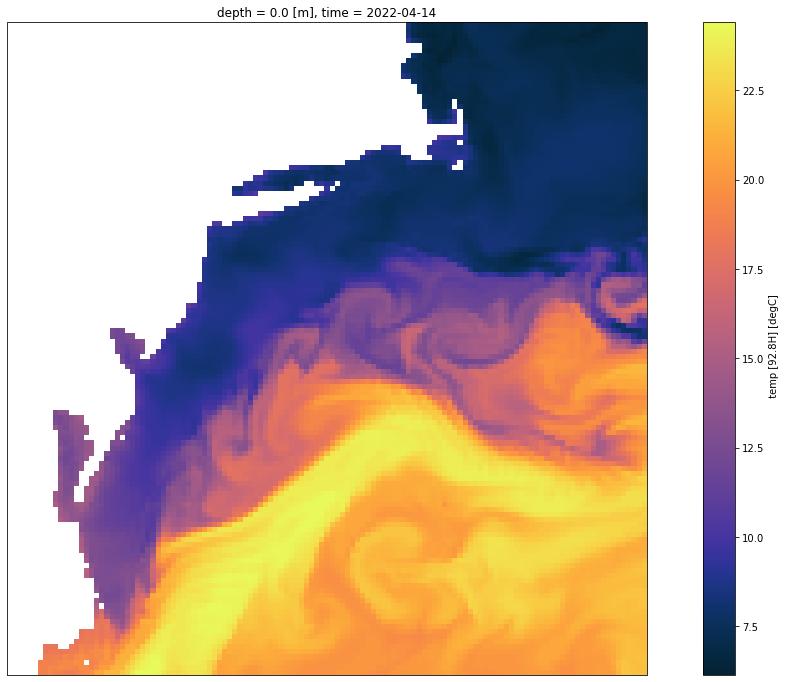

In [33]:
# Plot map
fig = plt.figure(figsize=(20, 12))
ax = plt.axes(projection=ccrs.Mercator())

da["temperature"].plot(x='lon', y='lat', transform=ccrs.PlateCarree(), cmap=cm.thermal, t)
# da["salinity"].plot(x='lon', y='lat', transform=ccrs.PlateCarree(), cmap=cm.haline)

# ax.plot(tlons, tlats, 'k-.', transform=ccrs.PlateCarree())
# coast_10m = cfeature.NaturalEarthFeature(
#     "physical", "land", "10m", edgecolor="k", facecolor="0.8"
# )
# ax.add_feature(coast_10m)

In [ ]:
# Interpolate
ids = rds.interp(
    x=xr.DataArray(tlons, dims="point"),
    y=xr.DataArray(tlats, dims="point"),
)
ids

In [ ]:
# Plot
levels = np.arange(6, 23, 1)
ids.temperature.plot(x="point", y="depth", levels=levels, figsize=(30,10), cmap=cm.thermal)
plt.ylim([500, 0])

In [ ]:
# Interpolate to depths
n = 1 # depths that we want to interpolate to
depth_interp = np.arange(0, rds.depth.max()+n, n)

# Interpolate
ids = tds.interp(
    x=xr.DataArray(tlons, dims="point"),
    y=xr.DataArray(tlats, dims="point"),
    depth=xr.DataArray(depth_interp, dims="depth")
)
ids

In [ ]:
# Plot
levels = np.arange(6, 23, 1)
ids.temperature.plot(x="point", y="depth", levels=levels, figsize=(30,10), cmap=cm.thermal)
plt.ylim([500, 0])